<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Tsne_analysis_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T-sne analysis in sklearn

t-SNE is a tool to visualize high-dimensional data.

https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

### Loading the Dataset

In [35]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
RAND=123

# import some data to play with
iris = datasets.load_iris()
X = iris.data

y = iris.target


#X=np.hstack((X,10*np.random.random((y.shape[0], 3))))
#X[:,6]=X[:,6]*X[:,0] +5*np.random.random((y.shape[0]))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


Baseline accuracy = 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_base)

Baseline accuracy =  0.9210526315789473


##  T-distributed Stochastic Neighbor Embedding.



In [37]:
from sklearn.manifold import TSNE
sklearn_tsne = TSNE( n_components=2)

X_train_tsne = sklearn_tsne.fit_transform(X_train)
X_test_tsne  = sklearn_tsne.fit_transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [38]:
nb_model.fit(X_train_tsne, y_train)
y_pred = nb_model.predict(X_test_tsne)
scores_base=accuracy_score(y_test,y_pred)
print("Tsne features accuracy = ", scores_base)

Tsne features accuracy =  0.05263157894736842


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

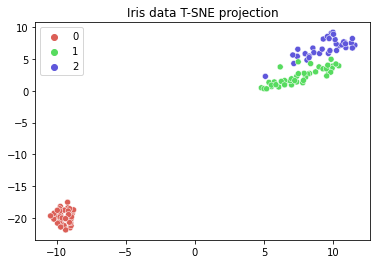

In [39]:
import seaborn as sns
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train,
                palette=sns.color_palette("hls", 3)).set(title="Iris data T-SNE projection") 

## Loading scikit-learn's MNIST Hand-Written Dataset

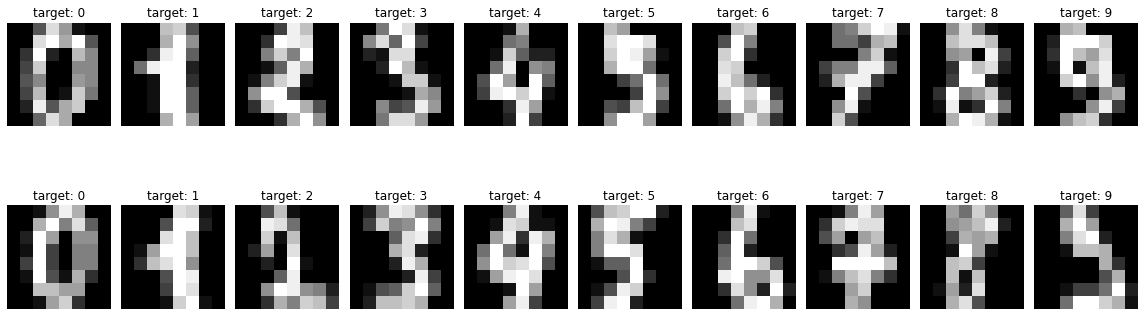

In [40]:
from sklearn.datasets import load_digits
mnist = load_digits()
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [41]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X.shape)

(1797, 64)


In [45]:
sklearn_tsne = TSNE( n_components=2)

X_train_tsne = sklearn_tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Digits data T-SNE projection')]

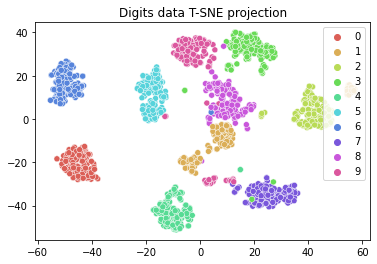

In [46]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train,
                palette=sns.color_palette("hls", 10)).set(title="Digits data T-SNE projection") 

In [44]:
X_test_tsne  = sklearn_tsne.fit_transform(X_test)
nb_model.fit(X_train_tsne, y_train)
y_pred = nb_model.predict(X_test_tsne)
scores_base=accuracy_score(y_test,y_pred)
print("Tsne features accuracy = ", scores_base)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Tsne features accuracy =  0.042222222222222223
